## 1. Accessing the drive and creating the directory structure

In [ ]:
!ls

sample_data


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
from drive.MyDrive.gitclone.BachelorArbeit_pre.Pytorch_Modules import Data_Setup

In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/NewExamples/ExambleVids/Nose/NoseLeftPatient2"

ls: cannot access '/content/drive/My Drive/NewExamples/ExambleVids/Nose/NoseLeftPatient2': No such file or directory


In [ ]:
from pathlib import Path
# Create a dataset directory with the same struchture of torch.utils.datasets.ImageFolder
classes_names = ["Nose", "Ear", "VocalFolds"]
train_test = ["train", "test"]
dataset_path = Path("/content/drive/My Drive/Dataset")
if dataset_path.is_dir():
  print("found")
else:
  print("Creating a data set directory structure")
  for directory in iter(train_test):
    for class_ in iter(classes_names):
      target = data_path / directory / class_
      target.mkdir(parents=True, exist_ok=True)

found


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Found {len(dirnames)} directories and {len(filenames)} Images in {dirpath}")

walk_through_dir(dataset_path)

Found 2 directories and 0 Images in /content/drive/My Drive/Dataset
Found 3 directories and 0 Images in /content/drive/My Drive/Dataset/train
Found 0 directories and 307 Images in /content/drive/My Drive/Dataset/train/Nose
Found 0 directories and 220 Images in /content/drive/My Drive/Dataset/train/Ear
Found 0 directories and 112 Images in /content/drive/My Drive/Dataset/train/VocalFolds
Found 3 directories and 0 Images in /content/drive/My Drive/Dataset/test
Found 0 directories and 128 Images in /content/drive/My Drive/Dataset/test/Nose
Found 0 directories and 37 Images in /content/drive/My Drive/Dataset/test/Ear
Found 0 directories and 78 Images in /content/drive/My Drive/Dataset/test/VocalFolds


In [ ]:
train_dir, test_dir = dataset_path / "train", dataset_path / "test"
train_dir, test_dir

(PosixPath('/content/drive/My Drive/Dataset/train'),
 PosixPath('/content/drive/My Drive/Dataset/test'))

## 2. a function to get the path of a random image in the dataset path and display it 

the dataset directory has to be in the format 

dataset:
- train
  - classes
- test
  - classes

Random image path: /content/drive/My Drive/Dataset/test/Nose/NoseRightPatient1_0052.png
Image Class: Nose
Image height: 1080
Image width: 1920


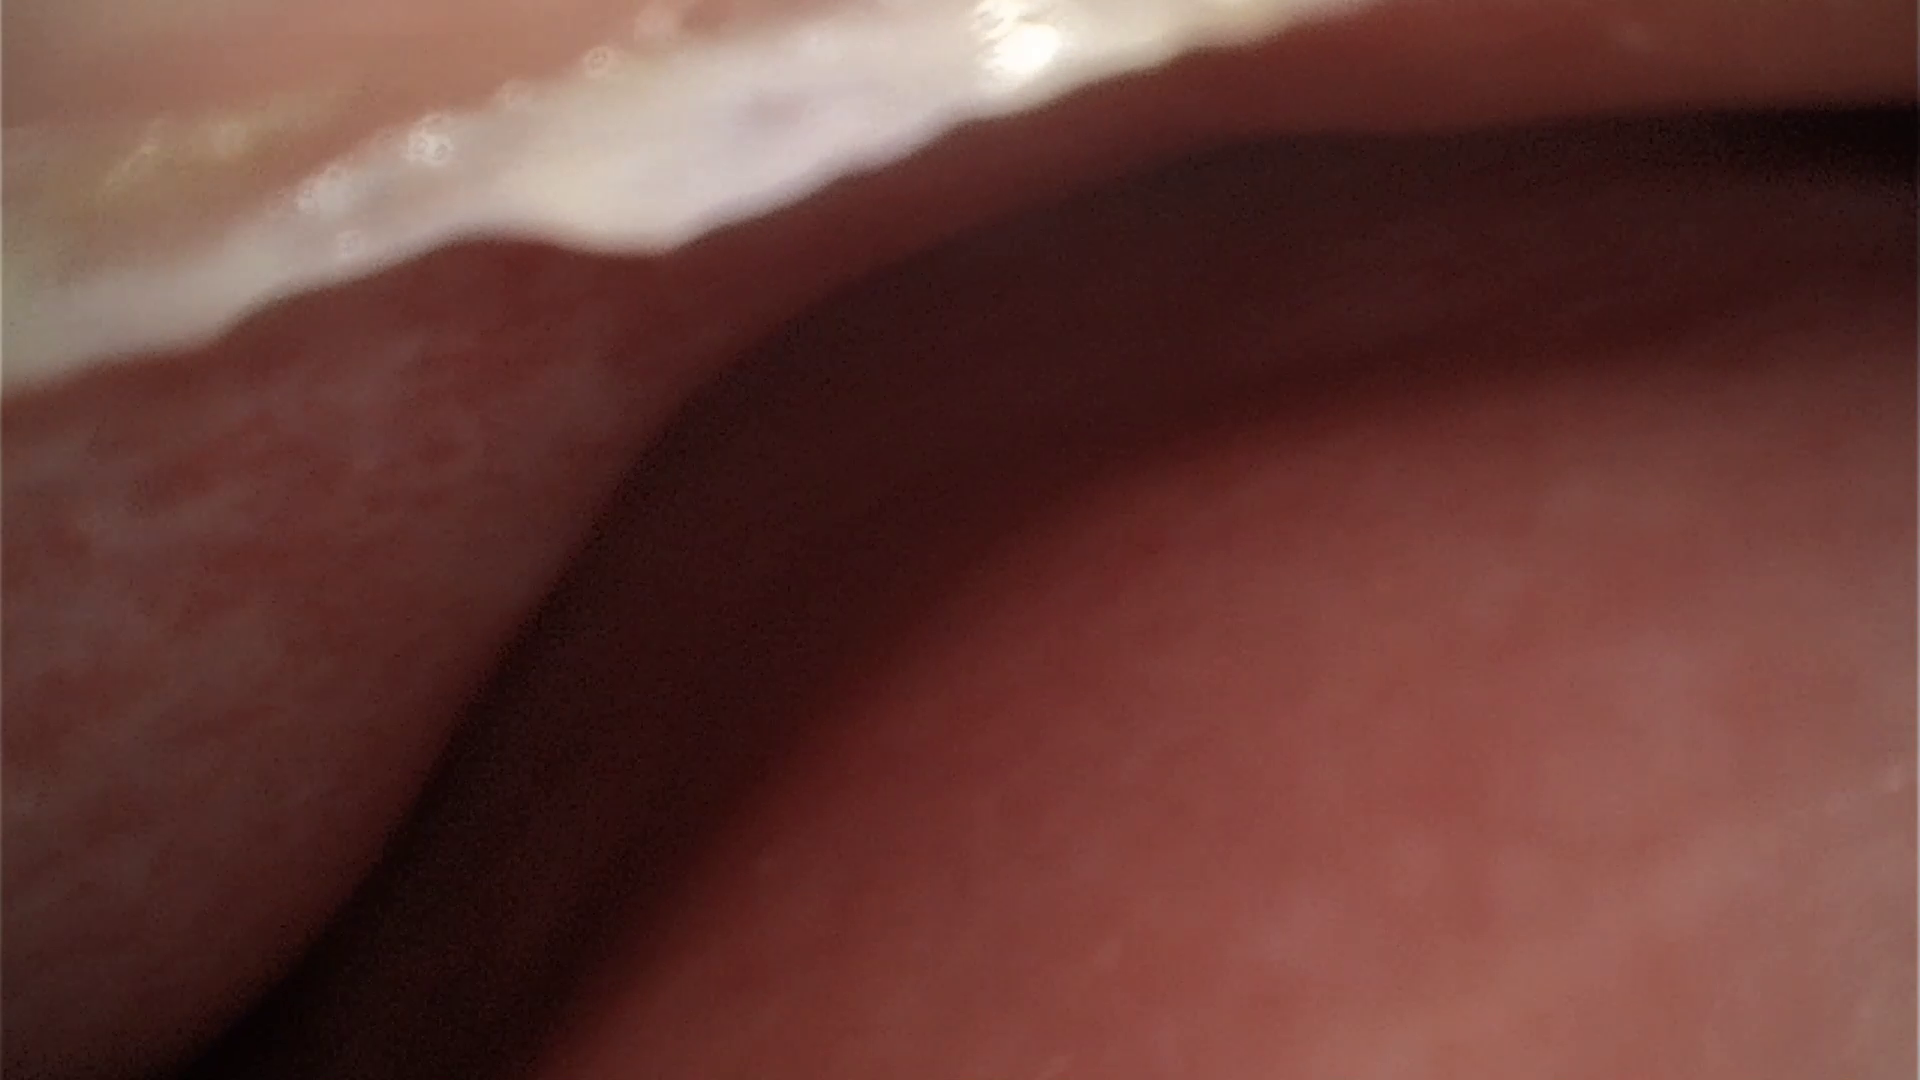

In [ ]:
import random
from PIL import Image
# random.seed(42)
def get_random_image_from_dir(dataset_path):
  # 1. get all image paths
  image_path_list = list(dataset_path.glob("*/*/*.png"))

  # 2. Pick a random image path 
  random_image_path = random.choice(image_path_list)

  # 3. Get Image clas from the path name
  image_class = random_image_path.parent.stem
  # 4. Open image
  img = Image.open(random_image_path)

  # 5. Print metadata
  print(f"Random image path: {random_image_path}")
  print(f"Image Class: {image_class}")
  print(f"Image height: {img.height}")
  print(f"Image width: {img.width}")
  return img, random_image_path

img, path = get_random_image_from_dir(dataset_path)
img

## 3. A fuction to convert an PIL image to a numpy array and display it if requiered

array([[[164, 141, 128],
        [147, 124, 111],
        [133, 110,  97],
        ...,
        [ 98,  65,  58],
        [104,  73,  65],
        [111,  80,  72]],

       [[163, 140, 127],
        [146, 123, 110],
        [133, 110,  97],
        ...,
        [ 97,  64,  57],
        [103,  72,  64],
        [110,  79,  71]],

       [[163, 140, 127],
        [146, 123, 110],
        [132, 109,  96],
        ...,
        [ 96,  65,  57],
        [101,  73,  64],
        [108,  80,  71]],

       ...,

       [[ 60,  37,  36],
        [ 53,  30,  29],
        [ 48,  25,  24],
        ...,
        [160, 132, 123],
        [164, 153, 148],
        [175, 164, 159]],

       [[ 60,  37,  36],
        [ 53,  30,  29],
        [ 48,  25,  24],
        ...,
        [160, 132, 123],
        [164, 153, 148],
        [175, 164, 159]],

       [[ 60,  37,  36],
        [ 53,  30,  29],
        [ 48,  25,  24],
        ...,
        [160, 132, 123],
        [164, 153, 148],
        [175, 164, 159]]

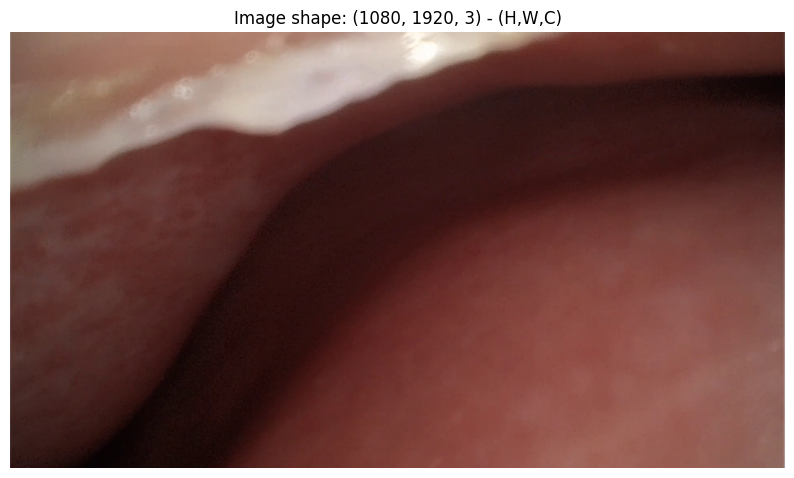

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def get_img_as_array(img, plot=True):
  # Turn image into an array
  img_as_array = np.asarray(img)
  if(plot):
    # Plot with matplotlib
    plt.figure(figsize=(10, 7))
    plt.imshow(img_as_array)
    plt.title(f"Image shape: {img_as_array.shape} - (H,W,C)")
    plt.axis(False)
  return img_as_array

get_img_as_array(img)

## 4. Transforming data

Try further: https://pytorch.org/vision/stable/transforms.html


What is the diff between nn.sequentiel and transforms.Compose?

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

### 4.1. A fuction to plot the transformed images and compare them to original

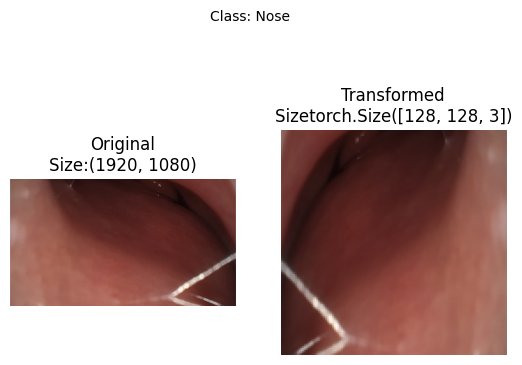

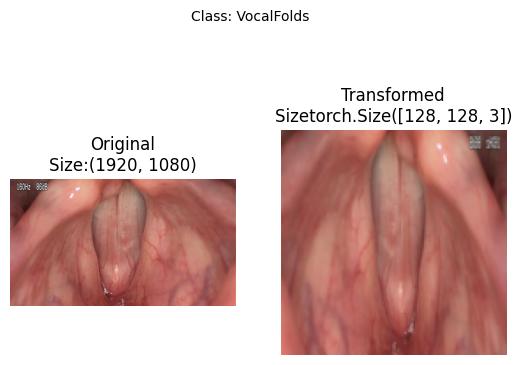

In [ ]:
def plot_transformed_images(image_paths, transform, n=2):
  
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)  # one row and two cols ax=coloumn
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis("off")

      # transform and plot image
      # The transformed Tensor has the shape CHW while matplotlib perfers HWC
      # this why permute the tensor (1, 2, 0)
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=10)
      
image_path_list = list(dataset_path.glob("*/*/*.png"))
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=2)


## 5. Loading Image data using `ImageFolder`

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 639
    Root location: /content/drive/My Drive/Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:Dataset ImageFolder
    Number of datapoints: 243
    Root location: /content/drive/My Drive/Dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names, class_dict = train_data.classes, train_data.class_to_idx
class_names, class_dict

(['Ear', 'Nose', 'VocalFolds'], {'Ear': 0, 'Nose': 1, 'VocalFolds': 2})

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 128, 128])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


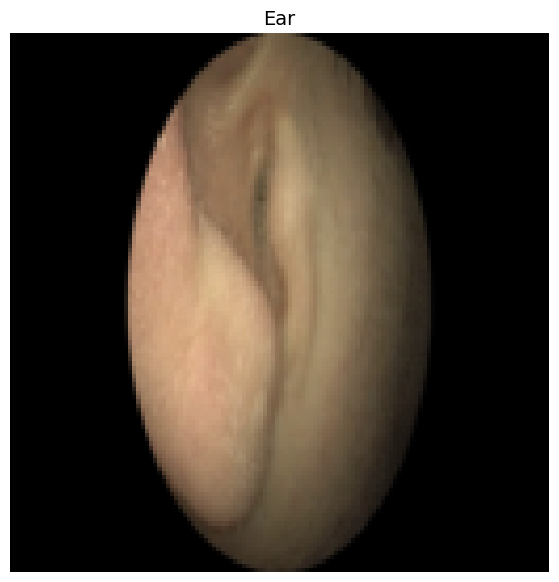

In [ ]:
# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # permute to adapt it to matplotlib
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## 6. Turn Loaded images into `DataLoader`
`batch_size` Pros and cons of large batches:
1. Bad Generalization: The CNN will perform not well on samples outside of the training set 
https://www.youtube.com/watch?v=ZBVwnoVIvZk
2. SGD: larger batch size for more stable obtimization

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1, # Multiprocessing
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f99b52f8be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f99b52fadd0>)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 7. Data augmentation
Random transforms to increase the randomness and diversity of the dataset and get better results on the data samples outside of the training data

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Learning patterns which are gerelizable to diffrent angels in the reallity

`transforms.TrivialAugmentWide()` :You have a set of transforms and you randomly pick a number of them to perform on an image and at a random magnitude between a given range (a higher magnitude means more instense)

In [ ]:
from torchvision import transforms

train_augmented_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 31 is max 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

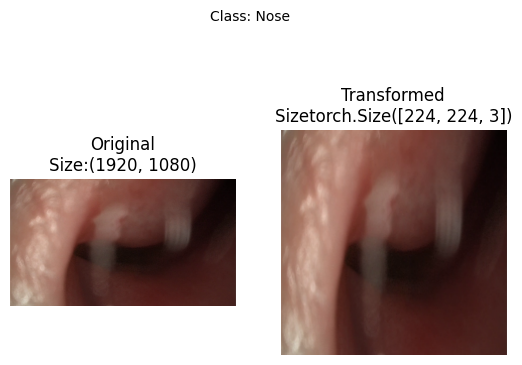

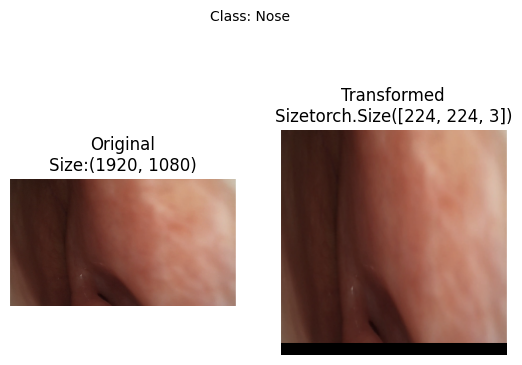

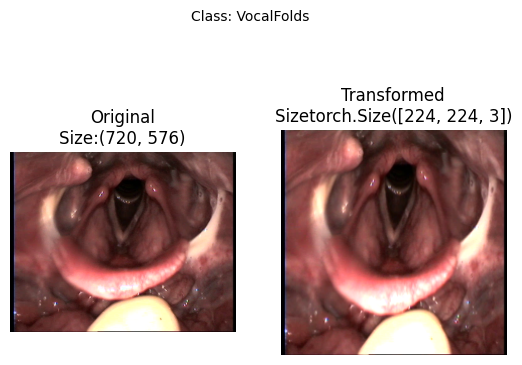

In [ ]:
# Get all image paths
image_path_list = list(dataset_path.glob("*/*/*.png"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_augmented_transforms,
    n=3
)

## 8. Model_0: TinyVGG without data augmentation

CNN Explainer website

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)), # for the tinyVGG
    transforms.ToTensor()
])

In [ ]:
# 1. Load transformed data
traindata_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform)
testdata_simple = datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)

# 2. turn data into dataloaders

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"creating DataLoaders with the batch size {BATCH_SIZE} and subprocces {NUM_WORKERS}")

traindataloader_simple = DataLoader(traindata_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)
testdataloader_simple = DataLoader(testdata_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

creating DataLoaders with the batch size 32 and subprocces 2


In [ ]:
len(traindataloader_simple), len(testdataloader_simple)

(20, 8)

In [ ]:
next(iter(traindataloader_simple))[0][1, 2, :, 5]  # coloumn 5 all rows

tensor([0.2745, 0.3490, 0.3490, 0.2706, 0.1882, 0.1529, 0.1490, 0.1451, 0.1451,
        0.1451, 0.1490, 0.1529, 0.1569, 0.1529, 0.1569, 0.1686, 0.1765, 0.1765,
        0.1725, 0.1725, 0.1686, 0.1725, 0.1725, 0.1765, 0.1804, 0.1804, 0.1804,
        0.1843, 0.1804, 0.1804, 0.1804, 0.1804, 0.1804, 0.1804, 0.1765, 0.1765,
        0.1765, 0.1765, 0.1765, 0.1725, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961,
        0.1961, 0.1922, 0.1922, 0.1882, 0.1922, 0.1922, 0.1922, 0.1961, 0.1922,
        0.1882, 0.1882, 0.1804, 0.1765, 0.1765, 0.1765, 0.1725, 0.1725, 0.1686,
        0.1686])

### 8.1 Creating TinyVGG model class

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units: int,
               output_shape: int)-> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # default sttride value is same as kernel size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # default sttride value is same as kernel size
    ) # output shape of the seccond block= torch.Size([1, 10, 13, 13])
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,  # Claculate it later after getting an error 
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benifits from operator fusion : no transfer between gpu and memory


In [ ]:
# torch.manual_seed(42) 
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(traindataloader_simple))
image_batch, label_batch

(tensor([[[[0.7176, 0.7216, 0.7373,  ..., 0.1098, 0.1843, 0.2314],
           [0.7176, 0.7216, 0.7333,  ..., 0.1333, 0.2000, 0.2510],
           [0.7176, 0.7255, 0.7373,  ..., 0.1490, 0.2157, 0.2706],
           ...,
           [0.5569, 0.5490, 0.5529,  ..., 0.6157, 0.6157, 0.6314],
           [0.5490, 0.5373, 0.5412,  ..., 0.6157, 0.6196, 0.6392],
           [0.5373, 0.5255, 0.5333,  ..., 0.6235, 0.6235, 0.6431]],
 
          [[0.4902, 0.4784, 0.4784,  ..., 0.0471, 0.0745, 0.0941],
           [0.4824, 0.4745, 0.4745,  ..., 0.0588, 0.0784, 0.1020],
           [0.4745, 0.4706, 0.4667,  ..., 0.0667, 0.0824, 0.1137],
           ...,
           [0.3490, 0.3333, 0.3176,  ..., 0.3255, 0.3294, 0.3647],
           [0.3451, 0.3216, 0.3098,  ..., 0.3255, 0.3333, 0.3686],
           [0.3412, 0.3176, 0.3059,  ..., 0.3294, 0.3373, 0.3765]],
 
          [[0.4196, 0.4039, 0.4039,  ..., 0.0510, 0.0706, 0.0902],
           [0.4118, 0.4039, 0.4039,  ..., 0.0549, 0.0745, 0.0980],
           [0.4039, 0.39

In [ ]:
# model_0(image_batch[0].unsqueeze(dim=0))

In [ ]:
# model_0(image_batch)

### 8.2 Use torchinfo to get a summery for the shapes going through our model

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 8.3 create training and testing loop functions

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  """ Performs training step with model trying to learn on daat_loader""" 
 
  train_loss, train_acc = 0, 0
  # Add a loop to loop through the trainig batches
  model.to(device)
  model.train()
  for batch, (X, y) in enumerate(data_loader): # X: img, y:label
    # Put data on target device
    X, y = X.to(device), y.to(device)
    # 1. Forwardpass
    y_pred = model(X)
    # 2. Calculate the loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumilatethe loss values every batch
  
    # 3. 
    optimizer.zero_grad()
    #4. 
    loss.backward()
    # 5. 
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)
  # devide total train loss by length of train dataloader to get the loss per batch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  return train_loss, train_acc*100

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device):
  """ Performs testing loop step with model trying to learn on daat_loader""" 
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # Make predictions 
      test_pred = model(X)

      # Accumulate the loss and acc values per batch 
      test_loss += loss_fn(test_pred, y)

       # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(test_pred)
    # Scale the loss to find the average loss per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    return test_loss, test_acc*100

In [ ]:
# create tunction which combines both steps
from tqdm.auto import tqdm
# q. create a train function that takes in various model parameters
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  # 2. Create empty results dict
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

  # 3. Loop through train and test steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       data_loader= train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                       data_loader= test_dataloader,
                                       loss_fn=loss_fn,
                                       device=device)
    print(f"Epoch {epoch} | Train loss:{train_loss:.4f} | Train acc: {train_acc:.2f}% |Test loss:{test_loss:.4f} | Test acc: {test_acc:.2f}%")

    results["train_loss"].append(train_loss.cpu().detach())  # send it to the cpu and detach to enable using it with matplotlib
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss.cpu().detach())
    results["test_acc"].append(test_acc)

  return results

### 8.4 Train and evaluate model_0

Overfitteng:
the loss curve of the training is going well but the loss curve of the testing isn't. This means the model is learning patterns from the train dataset, that don't generalize well to the test dataset
* increase lr
* early stopping
* reduce hidden layers



In [ ]:
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
# start the timer
from timeit import default_timer as timer
start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=traindataloader_simple,
                        test_dataloader=testdataloader_simple,
                        optimizer=optimizer,
                        epochs=15)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} secconds")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0 | Train loss:1.0465 | Train acc: 48.41% |Test loss:1.1308 | Test acc: 64.45%
Epoch 1 | Train loss:0.9144 | Train acc: 82.31% |Test loss:0.9592 | Test acc: 64.45%
Epoch 2 | Train loss:0.4011 | Train acc: 89.06% |Test loss:0.3121 | Test acc: 84.38%
Epoch 3 | Train loss:0.1834 | Train acc: 93.74% |Test loss:0.5974 | Test acc: 85.94%
Epoch 4 | Train loss:0.1138 | Train acc: 98.12% |Test loss:0.6760 | Test acc: 84.38%
Epoch 5 | Train loss:0.1071 | Train acc: 98.43% |Test loss:0.8808 | Test acc: 85.94%
Epoch 6 | Train loss:0.1035 | Train acc: 98.44% |Test loss:0.7647 | Test acc: 85.16%
Epoch 7 | Train loss:0.0941 | Train acc: 98.44% |Test loss:0.7759 | Test acc: 84.77%
Epoch 8 | Train loss:0.0932 | Train acc: 98.91% |Test loss:1.0807 | Test acc: 85.94%
Epoch 9 | Train loss:0.0840 | Train acc: 98.74% |Test loss:0.8028 | Test acc: 83.98%
Epoch 10 | Train loss:0.1003 | Train acc: 97.96% |Test loss:1.0000 | Test acc: 84.89%
Epoch 11 | Train loss:0.0776 | Train acc: 98.59% |Test loss:0.85

### 8.5 plot the loss curves of model_0

In [ ]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out the count od epocs
  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_acc")
  plt.plot(epochs, test_accuracy, label="test_acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()



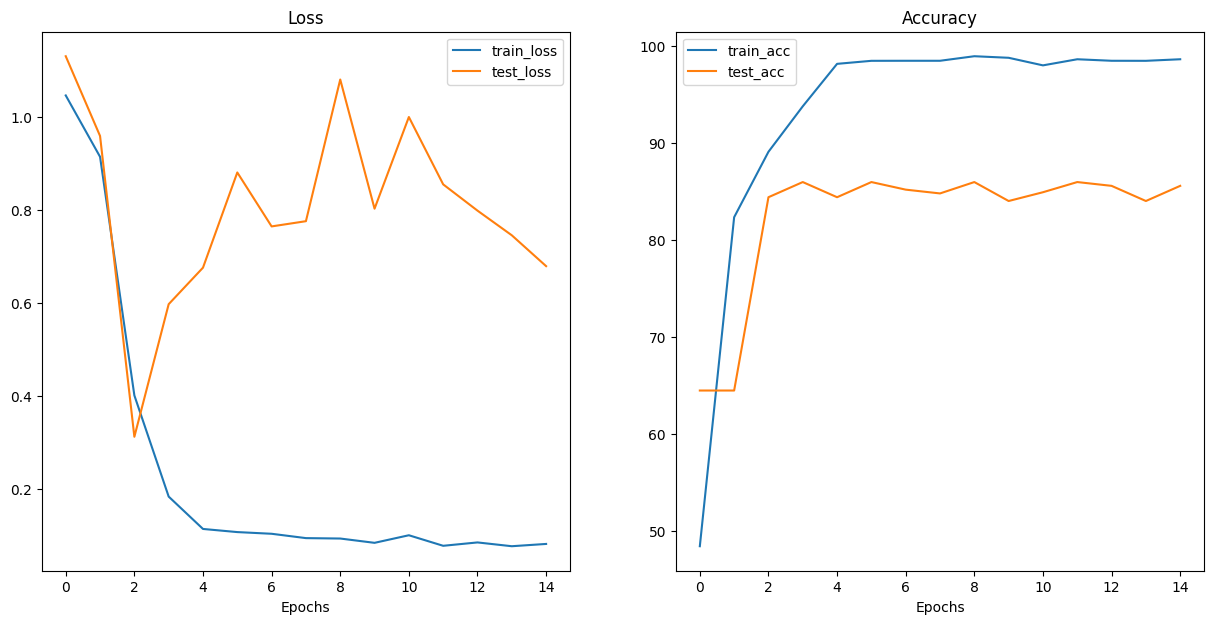

In [ ]:
plot_loss_curves(model_0_results)

## 9. model_0_1
Same model with data augmentation

In [ ]:
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(31),
                                              transforms.ToTensor()])
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)), # for the tinyVGG
    transforms.ToTensor()
])

### 9.1 train and test datasets and dataloader


In [ ]:
# 1. Load transformed data
traindata_augmented = datasets.ImageFolder(root=train_dir,
                                        transform=train_transform_trivial)
testdata_simple = datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)

# 2. turn data into dataloaders

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"creating DataLoaders with the batch size {BATCH_SIZE} and subprocces {NUM_WORKERS}")

traindataloader_augmented = DataLoader(traindata_augmented,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)
testdataloader_augmented = DataLoader(testdata_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

creating DataLoaders with the batch size 32 and subprocces 2


### 9.2 create and train model_1

In [ ]:
model_0_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(traindata_augmented.classes)).to(device)
model_0_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
optimizer = torch.optim.Adam(params=model_0_1.parameters(),
                             lr=0.001)
start_time = timer()

model_0_1_results = train(model=model_0_1,
                        train_dataloader=traindataloader_augmented,
                        test_dataloader=testdataloader_simple,
                        optimizer=optimizer,
                        epochs=15,
                        device=device)

end_time = timer()
print(f"total training time for model 1 {end_time-start_time:.3f} secs")

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0 | Train loss:1.0345 | Train acc: 46.64% |Test loss:1.1033 | Test acc: 50.00%
Epoch 1 | Train loss:0.8704 | Train acc: 60.59% |Test loss:0.8636 | Test acc: 63.67%
Epoch 2 | Train loss:0.6219 | Train acc: 71.38% |Test loss:0.6208 | Test acc: 85.94%
Epoch 3 | Train loss:0.5160 | Train acc: 84.66% |Test loss:0.5594 | Test acc: 85.94%
Epoch 4 | Train loss:0.4329 | Train acc: 87.63% |Test loss:0.5765 | Test acc: 83.98%
Epoch 5 | Train loss:0.3738 | Train acc: 89.05% |Test loss:0.4631 | Test acc: 78.52%
Epoch 6 | Train loss:0.3577 | Train acc: 88.73% |Test loss:0.4174 | Test acc: 84.38%
Epoch 7 | Train loss:0.3320 | Train acc: 88.11% |Test loss:0.3481 | Test acc: 86.33%
Epoch 8 | Train loss:0.3083 | Train acc: 89.49% |Test loss:0.3372 | Test acc: 85.55%
Epoch 9 | Train loss:0.2547 | Train acc: 92.18% |Test loss:0.3465 | Test acc: 84.77%
Epoch 10 | Train loss:0.2873 | Train acc: 90.77% |Test loss:0.4164 | Test acc: 73.07%
Epoch 11 | Train loss:0.2441 | Train acc: 92.49% |Test loss:0.16

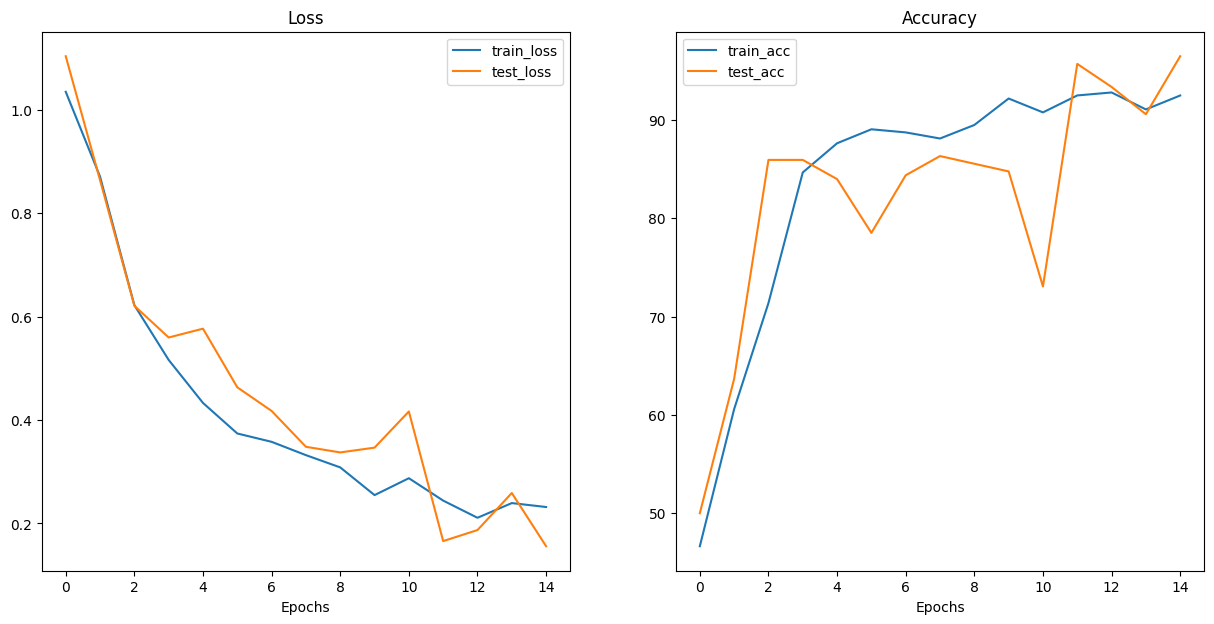

In [ ]:
plot_loss_curves(model_0_1_results)

## 10. Compare the results of the different models to each other

1. Hard coding 
2. PyTorch + Tensorboard
3. Weights and Biases (website)
4. MLflow



In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_0_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,tensor(1.0465),48.407258,tensor(1.1308),64.453125
1,tensor(0.9144),82.313508,tensor(0.9592),64.453125
2,tensor(0.4011),89.057460,tensor(0.3121),84.375000
3,tensor(0.1834),93.744960,tensor(0.5974),85.937500
4,tensor(0.1138),98.119960,tensor(0.6760),84.375000
5,tensor(0.1071),98.432460,tensor(0.8808),85.937500
6,tensor(0.1035),98.437500,tensor(0.7647),85.156250
7,tensor(0.0941),98.437500,tensor(0.7759),84.765625
8,tensor(0.0932),98.906250,tensor(1.0807),85.937500
9,tensor(0.0840),98.744960,tensor(0.8028),83.984375


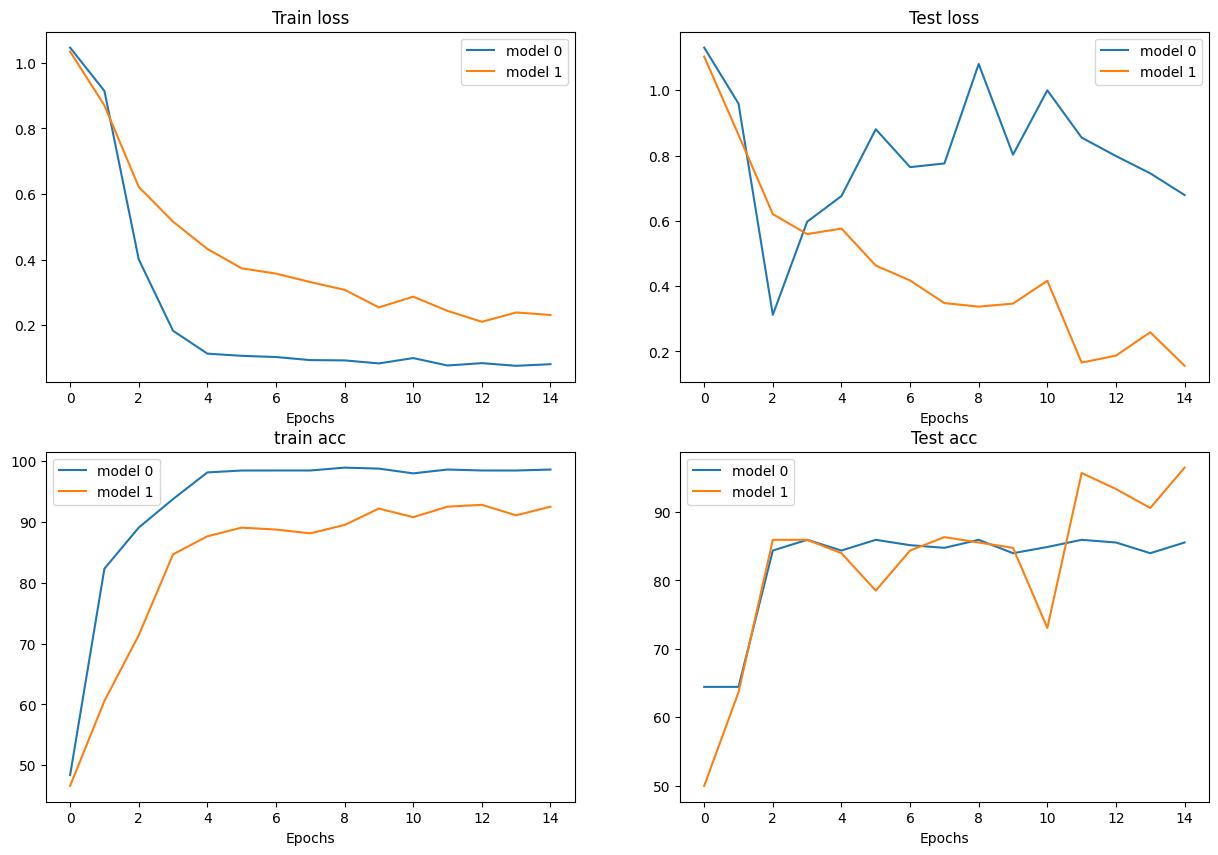

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model 0")
plt.plot(epochs, model_1_df["train_loss"], label="model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model 0")
plt.plot(epochs, model_1_df["test_loss"], label="model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

# plot train acc
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model 0")
plt.plot(epochs, model_1_df["train_acc"], label="model 1")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

# plot test acc
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model 0")
plt.plot(epochs, model_1_df["test_acc"], label="model 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend()

## 11. Making a prediction on a custom image 
that's not either in training or custom dataset

In [ ]:
img, path = get_random_image_from_dir(dataset_path)
!ls "/content/drive/My Drive/NewExamples/ExampleVids/Nose/frames"
!ls "/content/drive/My Drive/Dataset/test/Ear"

Random image path: /content/drive/My Drive/Dataset/train/Nose/NoseLeftPatient3_0096.png
Image Class: Nose
Image height: 1080
Image width: 1920
file1723158199_1622085180_Trim.mp4  scene01731.png  scene01821.png
scene01646.png			    scene01736.png  scene01826.png
scene01651.png			    scene01741.png  scene01831.png
scene01656.png			    scene01746.png  scene01836.png
scene01661.png			    scene01751.png  scene01841.png
scene01666.png			    scene01756.png  scene01846.png
scene01671.png			    scene01761.png  scene01851.png
scene01676.png			    scene01766.png  scene01856.png
scene01681.png			    scene01771.png  scene01861.png
scene01686.png			    scene01776.png  scene01866.png
scene01691.png			    scene01781.png  scene01871.png
scene01696.png			    scene01786.png  scene01876.png
scene01701.png			    scene01791.png  scene01881.png
scene01706.png			    scene01796.png  scene01886.png
scene01711.png			    scene01801.png  scene01891.png
scene01716.png			    scene01806.png  scene01896.png
scene01721


custom_image_pred_props = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_props

In [ ]:
def predict_on_custom(model: torch.nn.Module, 
                      img_path: str, 
                      class_names: List[str] = None, 
                      target_size=None,
                      device: torch.device = device):
  with Image.open(img_path) as f:
    custom_transform = transforms.Compose([transforms.Resize(size=(target_size, target_size)),
                                           transforms.ToTensor()])
    transformed_image = custom_transform(f)
    plt.imshow(f)


  model.eval()
  with torch.inference_mode():
    preds = model(transformed_image.unsqueeze(dim=0).to(device))

  # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
  target_image_pred_probs = torch.softmax(preds, dim=1)
  # 7. Convert prediction probabilities -> prediction labels
  class_idx = torch.argmax(target_image_pred_probs, dim=1)
  if class_names:
      title = f"Pred: {class_names[class_idx.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else: 
      title = f"Pred: {class_idx} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False);


In [ ]:
!ls "/content/drive/My Drive/NewExamples/ImagesFromTheInternet"

Ear_5.jfif	   EarInternet_4.png  Folds_4.png	  noseInternet_2.png
EarInternet_1.png  Folds_1.png	      Nose_4.jpg	  NoseInternet_3.png
EarInternet_2.png  Folds_2.png	      Nose_5.jpg
EarInternet_3.png  Folds_3.jpg	      NoseInternet_1.png


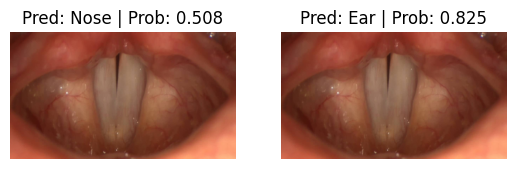

In [ ]:
plt.subplot(2,2,1)
predict_on_custom(model=model_0,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Folds_1.png",
                  class_names=class_names,
                  target_size=64,
                  device=device)
plt.subplot(2,2,2)
predict_on_custom(model=model_0_1,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Folds_1.png",
                  class_names=class_names,
                  target_size=64,
                  device=device)

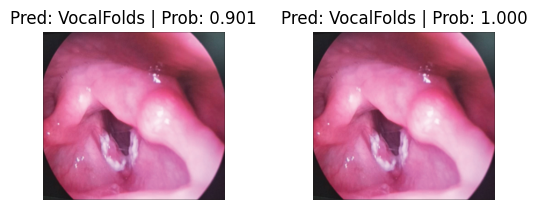

In [ ]:
plt.subplot(2,2,1)
predict_on_custom(model=model_0,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Folds_3.jpg",
                  class_names=class_names,
                  target_size=64,
                  device=device)
plt.subplot(2,2,2)
predict_on_custom(model=model_0_1,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Folds_3.jpg",
                  class_names=class_names,
                  target_size=64,
                  device=device)

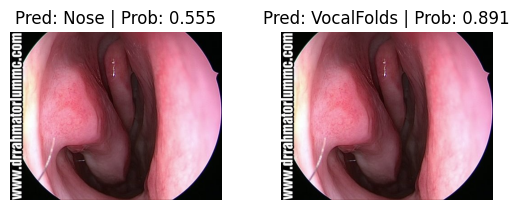

In [ ]:
plt.subplot(2, 2, 1)
predict_on_custom(model=model_0,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Nose_5.jpg",
                  class_names=class_names,
                  target_size=64,
                  device=device)
plt.subplot(2, 2, 2)
predict_on_custom(model=model_0_1,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Nose_5.jpg",
                  class_names=class_names,
                  target_size=64,
                  device=device)

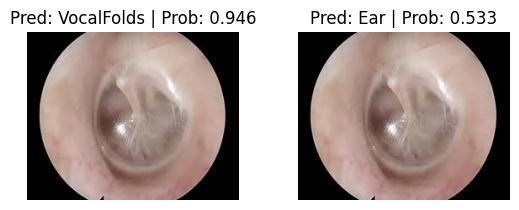

In [ ]:
plt.subplot(2,2,1)
predict_on_custom(model=model_0,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Ear_5.jfif",
                  class_names=class_names,
                  target_size=64,
                  device=device)
plt.subplot(2,2,2)
predict_on_custom(model=model_0_1,
                  img_path="/content/drive/My Drive/NewExamples/ImagesFromTheInternet/Ear_5.jfif",
                  class_names=class_names,
                  target_size=64,
                  device=device)